In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

In [2]:
variedinputCSV = 'final-merge-all-varied-first-pass.csv'
constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'
data = pd.read_csv(variedinputCSV)

In [3]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'

nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [5]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

 process the paricipant column of datafame if the value cotain "M" transform it into 0 and value contain "P" to "1"

In [7]:
data

Session id  Participant id  Start Time - ms  End Time - ms  \
0            S02               1                0           8812   
1            S02               1             8812           9380   
2            S02               1             9380          18149   
3            S02               1            18149          18620   
4            S02               1            18620          44627   
...          ...             ...              ...            ...   
14436        S23               1           357649         361628   
14437        S23               1           361628         361883   
14438        S23               1           361883         363365   
14439        S23               1           363365         363828   
14440        S23               1           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000   

In [8]:
data

Session id  Participant id  Start Time - ms  End Time - ms  \
0            S02               1                0           8812   
1            S02               1             8812           9380   
2            S02               1             9380          18149   
3            S02               1            18149          18620   
4            S02               1            18620          44627   
...          ...             ...              ...            ...   
14436        S23               1           357649         361628   
14437        S23               1           361628         361883   
14438        S23               1           361883         363365   
14439        S23               1           363365         363828   
14440        S23               1           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000   

Finishing preprceossng

In [9]:
responseList = set(data['CV - merge - M - L - S'].tolist())
responseList

{'Silience',
 'V',
 'V [V]',
 'V [V] V',
 'V [V] V [V]',
 'V [V] V [V] V',
 'V [V] V [V] V [V]',
 'V [V] V [V] V.',
 'V [V] V!',
 'V [V] V, V',
 'V [V] V, V [V] V.',
 'V [V] V, V, V',
 'V [V] V, V, V.',
 'V [V] V, V.',
 'V [V] V.',
 'V [V] V?',
 'V [V] [V]',
 'V [V] [V] V.',
 'V!',
 'V,',
 'V, V',
 'V, V [V]',
 'V, V [V] V',
 'V, V [V] V, V [V]',
 'V, V [V] V, V [V] V',
 'V, V [V] V.',
 'V, V [V] V?',
 'V, V!',
 'V, V! V.',
 'V, V, V',
 'V, V, V [V]',
 'V, V, V, V',
 'V, V, V, V.',
 'V, V, V, V?',
 'V, V, V.',
 'V, V, V?',
 'V, V.',
 'V, V?',
 'V, V? V',
 'V.',
 'V. V',
 'V. V! V.',
 'V. V.',
 'V. V. V.',
 'V. V?',
 'V. [V]',
 'V. [V] V.',
 'V?',
 'V? V',
 'V? V [V]',
 'V? V!',
 'V? V, V',
 'V? V.',
 'V? V?',
 'V? [V]',
 'V? [V] V',
 '[V]',
 '[V] V',
 '[V] V [V]',
 '[V] V [V] V',
 '[V] V [V] V [V]',
 '[V] V [V] V, V. V?',
 '[V] V [V] V.',
 '[V] V [V] V?',
 '[V] V!',
 '[V] V, V',
 '[V] V, V [V] V',
 '[V] V, V [V] V, V',
 '[V] V, V [V] [V] V',
 '[V] V, V, V',
 '[V] V, V.',
 '[V] V.',
 '[

In [ ]:
topicTerminationPuncation = ['.','!','?']

In [ ]:
otherSymbol = [';',',']

In [12]:
data['CV - merge - M - L - S']

0        Silience
1               V
2        Silience
3               V
4        Silience
           ...   
14436    Silience
14437           V
14438    Silience
14439           V
14440    Silience
Name: CV - merge - M - L - S, Length: 14441, dtype: object

In [11]:
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'

In [15]:
data

Session id  Participant id  Start Time - ms  End Time - ms  \
0            S02               1                0           8812   
1            S02               1             8812           9380   
2            S02               1             9380          18149   
3            S02               1            18149          18620   
4            S02               1            18620          44627   
...          ...             ...              ...            ...   
14436        S23               1           357649         361628   
14437        S23               1           361628         361883   
14438        S23               1           361883         363365   
14439        S23               1           363365         363828   
14440        S23               1           363828         365917   

       Duration - ms CV - merge - M - L - S concise merge type  \
0               8812               Silience           Silience   
1                568                      V                  S   
2               8769               Silience           Silience   
3                471                      V                  S   
4              26007               Silience           Silience   
...              ...                    ...                ...   
14436           3979               Silience           Silience   
14437            255                      V                  S   
14438           1482               Silience           Silience   
14439            463                      V                  S   
14440           2089               Silience           Silience   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
0                            0.601711                         0.359268   
1                            0.458016                         0.673469   
2                            0.348826                         0.000000   
3                            1.032122                         0.375000   
4                            0.425555                         0.023911   
...                               ...                              ...   
14436                        1.614275                         0.353846   
14437                        1.109623                         0.555556   
14438                        0.394520                         0.007092   
14439                        2.253242                         0.794872   
14440                        0.633792                         0.000000   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
0                             0.092677  ...                      7.551740   
1                             0.122449  ...                      6.117432   
2                             0.234753  ...                      5.307438   
3                             0.025000  ...                      3.362701   
4                             0.177015  ...                      7.156795   
...                                ...  ...                           ...   
14436                         0.887179  ...                      4.958942   
14437                         0.000000  ...                      0.000000   
14438                         0.737589  ...                      4.935449   
14439                         0.128205  ...                      3.618804   
14440                         0.985075  ...                      5.561443   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
0                          0.609021                     2.001329   
1                          0.692077                     1.598350   
2                          0.441913                     2.102095   
3                          0.370775                     3.013800   
4                          0.576666                     2.056919   
...                             ...                          ...   
14436                      0.473761                     2.045455   
14437                      0.000000   

iterate each row of this dataframe, when this row's 'concise event type' is discouse or mirthful laughter and your need to check the previous row event in the 'cocise event type' for specific laughter,such as discouse laughter and record it .Besides, you also need to check previous row' 'complex event type' column to check the value in this colum contain topicTerminationPuncation symbol like ['.','!','?'] and or other symbol. And you also need to sepeate the string in the previous row's 'complex event type' by space to store the last string .

In [16]:
import pandas as pd




discourse_laughter_previousLastWord= []
discouseLaughter_previousEvent = []
# used a counter to counter the number eevent to topic termination
discouseLaughter_topicTermination = 0


for index, row in data.iterrows():
    if row['concise merge type'] in [discoureLaugh, mirthfulLaugh]:
        # Check if not the first row
        if index > 0:
        
            prev_row = data.iloc[index - 1]
            prev_concise_event = prev_row['concise merge type']
            prev_complex_event = prev_row['CV - merge - M - L - S']
            
            currentEvent = row['concise merge type']
            if currentEvent == discoureLaugh:
                last_word = prev_complex_event.split()[-1]
                discourse_laughter_previousLastWord.append(last_word)
                # also check preivous event 
                discouseLaughter_previousEvent.append(prev_concise_event)
                
                if  any(symbol in prev_complex_event for symbol in ['.', '!', '?']):
                    discouseLaughter_topicTermination+=1
                
                

print("Discourse Laughter laster word:", discourse_laughter_previousLastWord)
print("Discourse Laughter previous event:", discouseLaughter_previousEvent)


Discourse Laughter laster word: ['Silience', 'Silience', 'Silience', 'Silience', 'Silience', 'Silience', 'Silience', 'Silience', 'V', 'V', 'Silience', 'V', 'Silience', 'Silience', 'V?', 'Silience', 'V', 'V', 'V', 'V?', 'V', '[laugh]-Discourse', 'V', '[laugh]-Discourse', 'Silience', 'V', 'V', '[V]', 'V', 'V', 'Silience', 'V', 'Silience', 'Silience', 'Silience', 'V', '[laugh]-Discourse', 'V', 'Silience', 'V', 'Silience', 'Silience', 'V', 'Silience', 'V', 'V', 'Silience', 'Silience', 'V', 'V', 'V', 'Silience', 'V', 'V?', 'V.', 'Silience', 'V', 'V', 'Silience', 'V', 'V', 'Silience', 'V', 'V?', 'Silience', 'Silience', 'V', 'V?', 'V.', '[laugh]-Discourse', 'V.', 'Silience', 'Silience', 'Silience', 'V', 'Silience', 'V.', 'V', 'V', 'V', 'V', 'V.', '[laugh]-Discourse', 'V', 'Silience', 'Silience', 'V', 'Silience', 'Silience', 'V', 'Silience', 'V', 'Silience', 'Silience', '[V]', 'Silience', 'Silience', '[laugh]-Discourse', 'V', 'V', 'V', 'Silience', 'Silience', 'Silience', 'Silience', 'V', 'Sili

In [22]:
discouseLaughter_previousEvent

['Silience',
 'Silience',
 'Silience',
 'Silience',
 'Silience',
 'Silience',
 'Silience',
 'Silience',
 'S',
 'S',
 'Silience',
 'S',
 'Silience',
 'Silience',
 'S',
 'Silience',
 'S',
 'S',
 'S',
 'S',
 'S',
 '[laugh]-Discourse',
 'S',
 '[laugh]-Discourse',
 'Silience',
 'S',
 'S',
 '[V]',
 'S',
 'S',
 'Silience',
 'S',
 'Silience',
 'Silience',
 'Silience',
 'S',
 '[laugh]-Discourse',
 'S',
 'Silience',
 'S',
 'Silience',
 'Silience',
 'S',
 'Silience',
 'S',
 'S',
 'Silience',
 'Silience',
 'S',
 'S',
 'S',
 'Silience',
 'S',
 'S',
 'S',
 'Silience',
 'S',
 'S',
 'Silience',
 'S',
 'S',
 'Silience',
 'S',
 'S',
 'Silience',
 'Silience',
 'S',
 'S',
 'S',
 '[laugh]-Discourse',
 'S',
 'Silience',
 'Silience',
 'Silience',
 'S',
 'Silience',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 '[laugh]-Discourse',
 'S',
 'Silience',
 'Silience',
 'S',
 'Silience',
 'Silience',
 'S',
 'Silience',
 'S',
 'Silience',
 'Silience',
 'M',
 'Silience',
 'Silience',
 '[laugh]-Discourse',
 'S',
 'S',
 'S',
 '

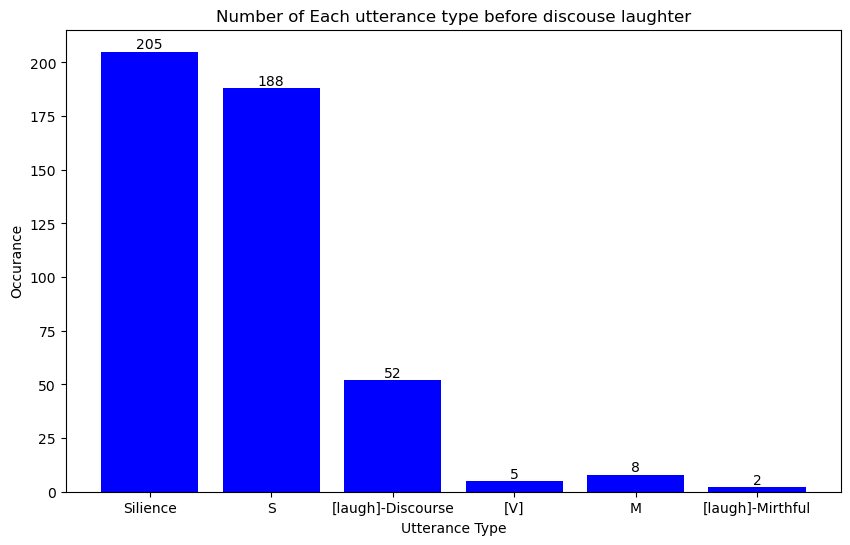

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

types_list = discouseLaughter_previousEvent


type_counts = Counter(types_list)


types = list(type_counts.keys())
counts = list(type_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color='blue')

plt.title('Number of Each utterance type before discouse laughter')
plt.xlabel('Utterance Type')
plt.ylabel('Occurance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.savefig('DiscouseLaughterPreviousEevent.png')

plt.show()


In [17]:
discouseLaughter_topicTermination

63

In [18]:
discouseLaughterDF = data[data['concise merge type']==discoureLaugh]

In [21]:
lengthOdDiscouse = len(discouseLaughterDF)
lengthOdDiscouse

460

# Mirthful Laughter

In [30]:
import pandas as pd




mirthful_laughter_previousLastWord= []
mirthfulLaughter_previousEvent = []

mirthfulLaughter_topicTermination = 0


for index, row in data.iterrows():
    if row['concise merge type'] in [discoureLaugh, mirthfulLaugh]:
        # Check if not the first row
        if index > 0:
        
            prev_row = data.iloc[index - 1]
            prev_concise_event = prev_row['concise merge type']
            prev_complex_event = prev_row['CV - merge - M - L - S']
            
            currentEvent = row['concise merge type']
            if currentEvent == mirthfulLaugh:
                last_word = prev_complex_event.split()[-1]
                mirthful_laughter_previousLastWord.append(last_word)
                # also check preivous event 
                mirthfulLaughter_previousEvent.append(prev_concise_event)
                
                if  any(symbol in prev_complex_event for symbol in ['.', '!', '?']):
                    mirthfulLaughter_topicTermination+=1
                
                
print("mirthful Laughter laster word:", mirthful_laughter_previousLastWord)
print("mirthful Laughter previous event:", mirthfulLaughter_previousEvent)


mirthful Laughter laster word: ['Silience', 'V', 'Silience', 'Silience', 'V', 'Silience', 'V', 'Silience', 'V', 'Silience', '[V]', 'V', 'Silience', 'Silience', 'Silience', 'V', 'V', 'Silience', '[laugh]-Mirthful', 'V', '[laugh]-Mirthful', 'Silience', '[laugh]-Mirthful', 'Silience', 'V', 'Silience', 'V', 'Silience', 'Silience', 'V', 'Silience', 'Silience', 'V', 'Silience', 'V', 'V', 'V', 'Silience', 'V', 'Silience', 'Silience', 'V?', 'V', 'V', 'V', 'Silience', 'V', 'V', 'V', 'Silience', 'V', 'V?', '[laugh]-Mirthful', '[laugh]-Mirthful', 'Silience', 'Silience', '[laugh]-Mirthful', '[laugh]-Mirthful', '[laugh]-Mirthful', '[laugh]-Mirthful', 'Silience', 'Silience', 'Silience', 'Silience', 'V?', 'Silience', 'Silience', 'Silience', 'Silience', 'V', 'V', '[laugh]-Mirthful', 'Silience', '[laugh]-Mirthful', '[laugh]-Mirthful', '[laugh]-Mirthful', 'Silience', '[laugh]-Mirthful', 'Silience', 'V', 'Silience', '[laugh]-Mirthful', 'Silience', 'V', 'Silience', '[laugh]-Mirthful', 'V', 'Silience', 'Si

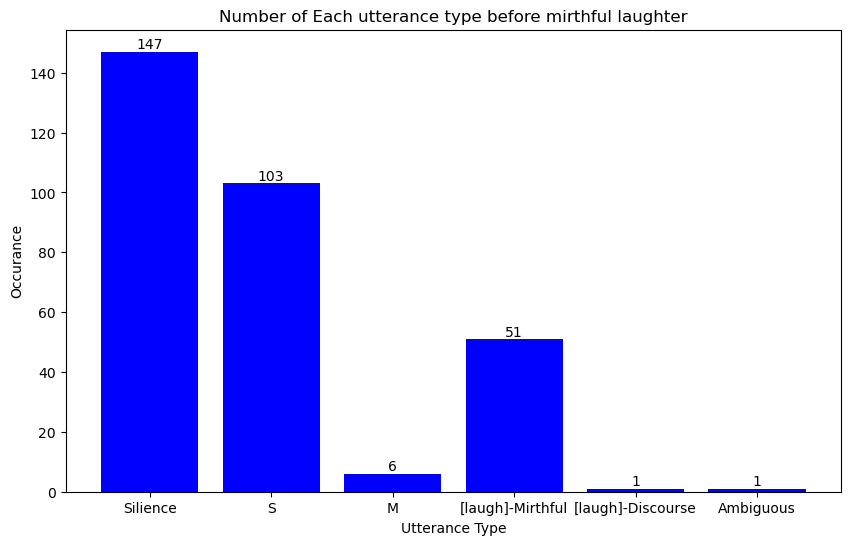

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

types_list = mirthfulLaughter_previousEvent


type_counts = Counter(types_list)


types = list(type_counts.keys())
counts = list(type_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color='blue')

plt.title('Number of Each utterance type before mirthful laughter')
plt.xlabel('Utterance Type')
plt.ylabel('Occurance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.savefig('MirthfulLaughterPreviousEevent.png')

plt.show()


In [34]:
mirthfulLaughterDF = data[data['concise merge type']==mirthfulLaugh]
lengthOfMirthful = len(mirthfulLaughterDF)
lengthOfMirthful

309

In [35]:
mirthfulLaughter_topicTermination

30